In [1]:
import pandas as pd
import seaborn as sns

In [2]:
filepath = "data/athlete_events.csv"

df = pd.read_csv(filepath)
df.shape

(271116, 15)

In [3]:
columns_to_drop = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event']
df.dropna(subset=columns_to_drop, inplace=True)
df.shape

(206165, 15)

In [4]:
df["Medal"].unique()
df.fillna("No Medal", inplace=True)
df["Won medal"] = (df.Medal != "No Medal")

<Axes: xlabel='Won medal', ylabel='Height'>

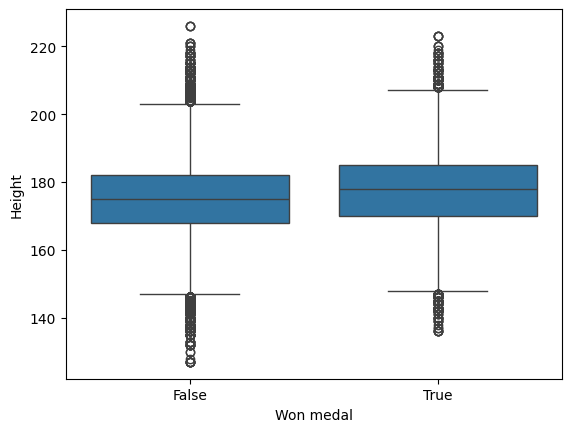

In [5]:
sns.boxplot(data=df, x="Won medal", y="Height")

<Axes: xlabel='Won medal', ylabel='Weight'>

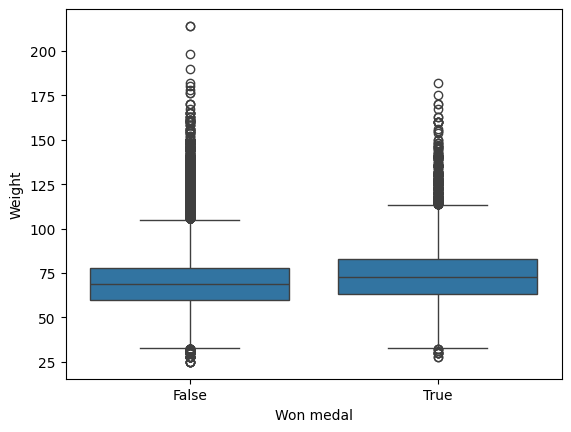

In [6]:
sns.boxplot(data=df, x="Won medal", y="Weight")

<Axes: xlabel='Won medal', ylabel='Age'>

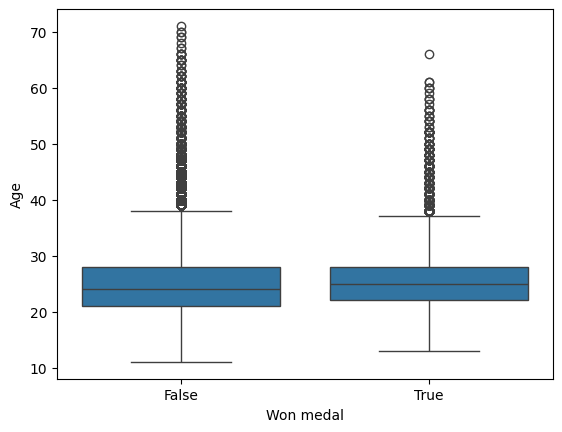

In [7]:
sns.boxplot(data=df, x="Won medal", y="Age")

In [8]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

<Axes: xlabel='Won medal', ylabel='Height'>

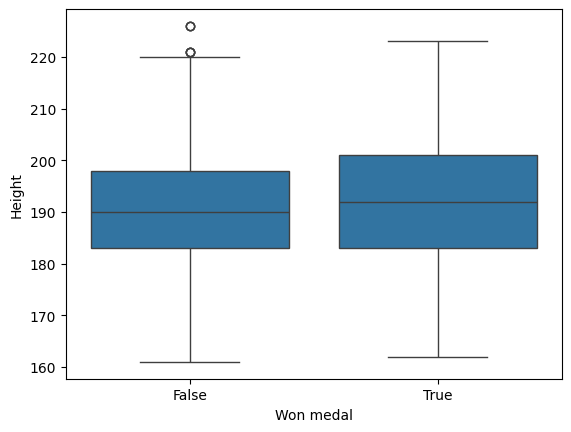

In [9]:
sns.boxplot(data=df[df.Sport == "Basketball"], x="Won medal", y="Height")

<Axes: xlabel='Won medal', ylabel='Height'>

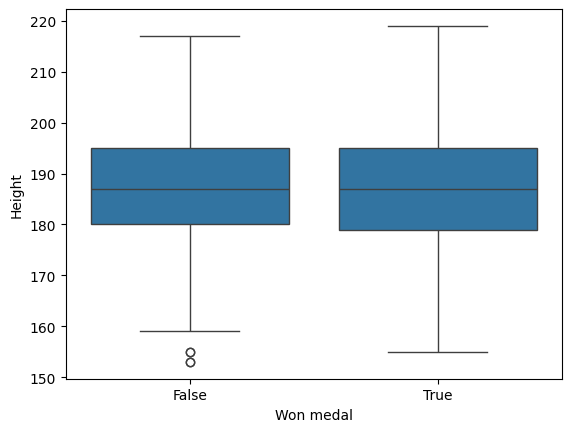

In [10]:
sns.boxplot(data=df[df.Sport == "Volleyball"], x="Won medal", y="Height")

In [11]:
df["Games"].unique()

array(['1992 Summer', '2012 Summer', '1988 Winter', '1992 Winter',
       '1994 Winter', '2002 Winter', '1980 Winter', '2000 Summer',
       '1996 Summer', '2014 Winter', '1948 Summer', '1952 Summer',
       '1998 Winter', '2006 Winter', '2016 Summer', '2004 Summer',
       '1984 Winter', '1968 Summer', '1972 Summer', '1936 Summer',
       '1956 Summer', '1960 Summer', '1920 Summer', '1924 Summer',
       '1928 Summer', '2008 Summer', '1976 Summer', '1988 Summer',
       '1980 Summer', '1984 Summer', '1964 Summer', '2010 Winter',
       '1964 Winter', '1968 Winter', '1972 Winter', '1976 Winter',
       '1924 Winter', '1912 Summer', '1932 Summer', '1932 Winter',
       '1936 Winter', '1928 Winter', '1908 Summer', '1956 Winter',
       '1960 Winter', '1952 Winter', '1948 Winter', '1906 Summer',
       '1904 Summer', '1900 Summer', '1896 Summer'], dtype=object)

<Axes: xlabel='Season', ylabel='ID'>

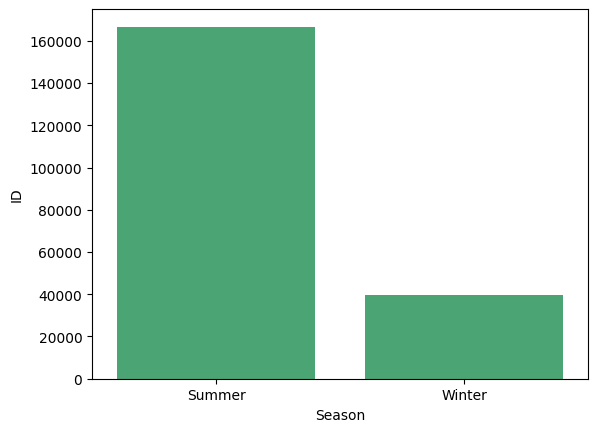

In [12]:
df["Season"] = df["Games"].apply(lambda x: x.split()[1])
sns.barplot(df.groupby("Season").count()["ID"], color="mediumseagreen")

In [13]:
df["Season"].unique()
df[df.Season == "Winter"].shape

(39459, 16)

In [14]:
summer = df[df.Season == "Summer"]
summer.shape

(166706, 16)

In [15]:
summer["Sport"].unique()

array(['Basketball', 'Judo', 'Badminton', 'Sailing', 'Gymnastics',
       'Athletics', 'Weightlifting', 'Wrestling', 'Rowing', 'Swimming',
       'Football', 'Equestrianism', 'Shooting', 'Taekwondo', 'Boxing',
       'Fencing', 'Diving', 'Canoeing', 'Handball', 'Water Polo',
       'Tennis', 'Cycling', 'Hockey', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Golf', 'Rugby', 'Tug-Of-War',
       'Ice Hockey', 'Art Competitions', 'Lacrosse', 'Motorboating',
       'Figure Skating'], dtype=object)

In [16]:
summer.shape

(166706, 16)

In [41]:
appearances = summer.groupby("Sport")["ID"].count()
appearances.sort_values(inplace=True)
appearances

Sport
Motorboating                 1
Figure Skating               2
Lacrosse                     2
Ice Hockey                  18
Tug-Of-War                  20
Art Competitions            28
Rugby                       30
Golf                       108
Trampolining               149
Rugby Sevens               297
Softball                   441
Triathlon                  526
Beach Volleyball           538
Taekwondo                  596
Rhythmic Gymnastics        615
Baseball                   846
Synchronized Swimming      849
Modern Pentathlon         1259
Badminton                 1362
Table Tennis              1789
Archery                   1883
Tennis                    2008
Diving                    2011
Water Polo                2719
Weightlifting             2974
Volleyball                3277
Handball                  3319
Judo                      3366
Basketball                3668
Hockey                    4264
Boxing                    4363
Football                  4443
Eq

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11296\3336183057.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


<Axes: xlabel='Sport', ylabel='ID'>

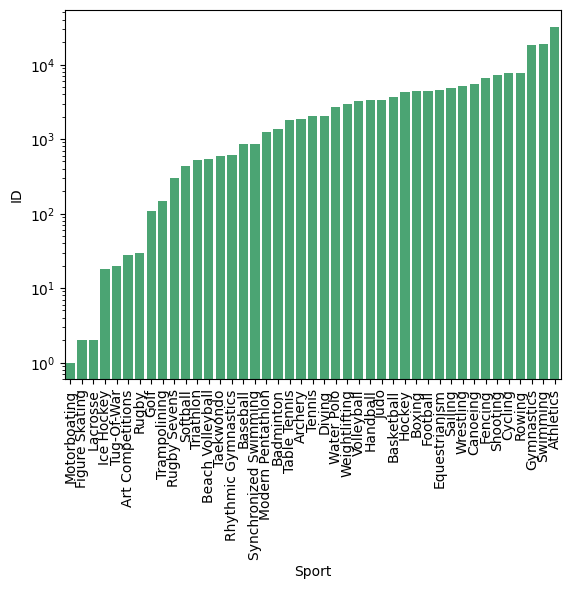

In [42]:
plot = sns.barplot(appearances, color="mediumseagreen")
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_yscale("log")
plot

In [43]:
by_gender = summer.groupby("Sex")["ID"].count()
by_gender

Sex
F     53381
M    113325
Name: ID, dtype: int64

[Text(0, 0.5, 'Participations')]

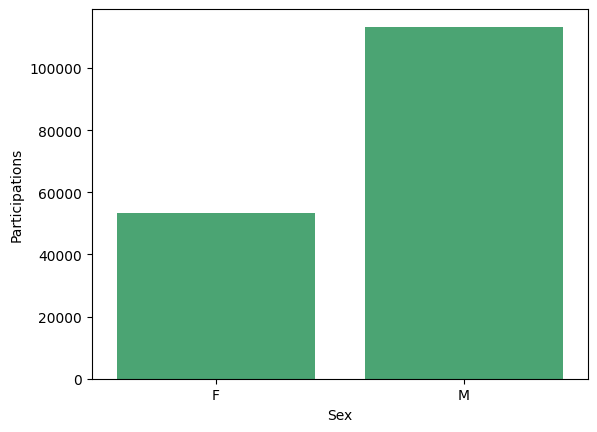

In [45]:
plot = sns.barplot(by_gender, color="mediumseagreen")
plot.set(ylabel="Participations")

In [21]:
gender_ratio_by_year = summer.groupby(["Year"]).apply(lambda df: df[df.Sex == 'F'].shape[0] / df.shape[0])

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11296\3491502968.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_ratio_by_year = summer.groupby(["Year"]).apply(lambda df: df[df.Sex == 'F'].shape[0] / df.shape[0])


In [25]:
gender_ratio_by_year.head()

Year
1896    0.0
1900    0.0
1904    0.0
1906    0.0
1908    0.0
dtype: float64

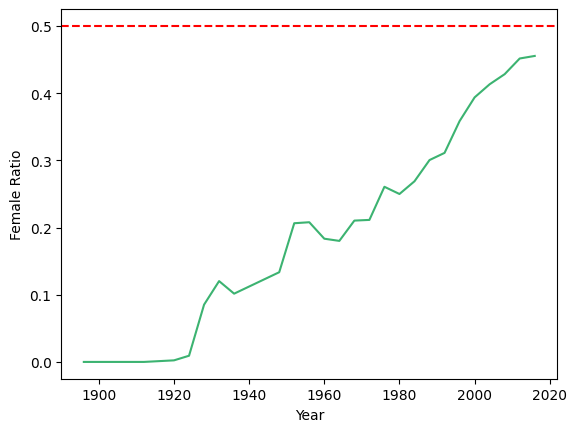

In [39]:
plot = sns.lineplot(gender_ratio_by_year, color="mediumseagreen")
plot.set(ylabel="Female Ratio")
plot.axhline(y=0.5, color='red', linestyle='--')


In [51]:
basketball = summer[summer.Sport=="Basketball"]

C:\Users\Rafael\AppData\Local\Temp\ipykernel_11296\1189965444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['SportType'] = summer['Sport'].map({


<Axes: ylabel='Height'>

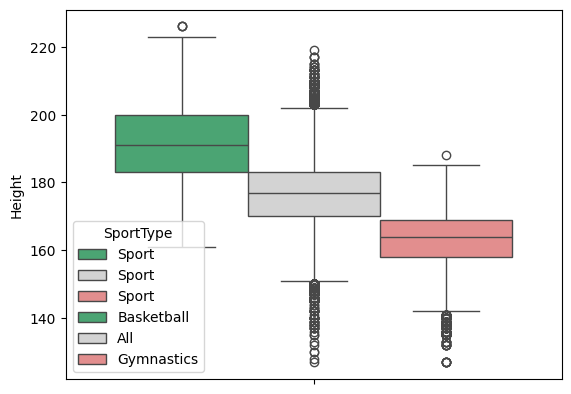

In [66]:
summer['SportType'] = summer['Sport'].map({
    "Basketball": "Basketball",
    "Gymnastics": "Gymnastics"
}).fillna("All")
sns.boxplot(data=summer, y="Height", hue="SportType", palette={"Basketball": "mediumseagreen", "Gymnastics": "lightcoral", "All": "lightgray"})


<Axes: ylabel='Weight'>

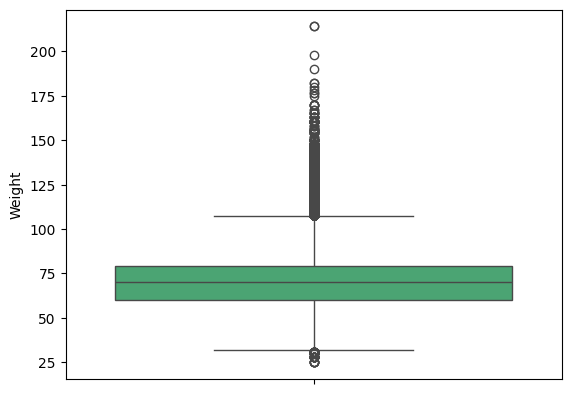

In [48]:
sns.boxplot(summer["Weight"],color="mediumseagreen")

<Axes: ylabel='Age'>

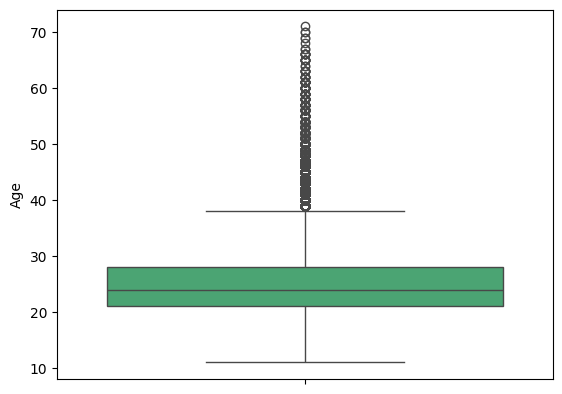

In [49]:
sns.boxplot(summer["Age"],color="mediumseagreen")

In [50]:
basketball = summer[summer.Sport=="Basketball"]